In [3]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

%matplotlib inline

link to dataset: https://www.kaggle.com/divyansh22/us-border-crossing-data

In [4]:
data = "Border_Crossing_Entry_Data.csv"
df = pd.read_csv(data)
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [5]:
#Drop all NaNs in the data
df.dropna(inplace=True)
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [6]:
#converting Date to datetime instance
df['Date'] = pd.to_datetime(df['Date'])
years = df['Date'].dt.year.unique().tolist() #Extract years from the date
years.remove(2020) #Remove 2020 due to insufficient data
df.Date.dt.year.value_counts()

2010    16200
2005    16128
2006    16128
2008    16056
2007    16056
2009    16056
2004    15984
2015    15984
2011    15840
2012    15840
2013    15840
2014    15840
2003    15588
2001    14832
2000    14832
1999    14832
1998    14832
1997    14832
1996    14832
2002    14832
2016    13754
2017     9717
2019     9593
2018     9534
2020     1549
Name: Date, dtype: int64

In [7]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2020-02-01,Trucks,545


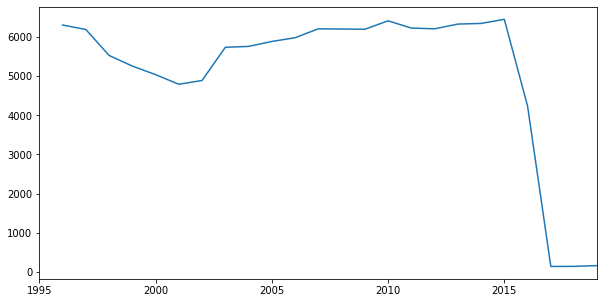

In [8]:
#creating two lists
counts = [] #counts of the busiest years
busiest_year = [] #Number of people crossing per year
for year in years:
    df1 = df[df['Date'].dt.year==year]
    df1 = df1['Value'].value_counts().reset_index()
    busiest_year.append(df1.loc[0]['index'])
    counts.append(df1.loc[0]['Value'])
    
fig = plt.figure(figsize=(10,5))
sns.lineplot(years, counts)
plt.xlim(1995,2019)
plt.show()

### Check different distributions of People Crossing at the borders and the means of their crossing

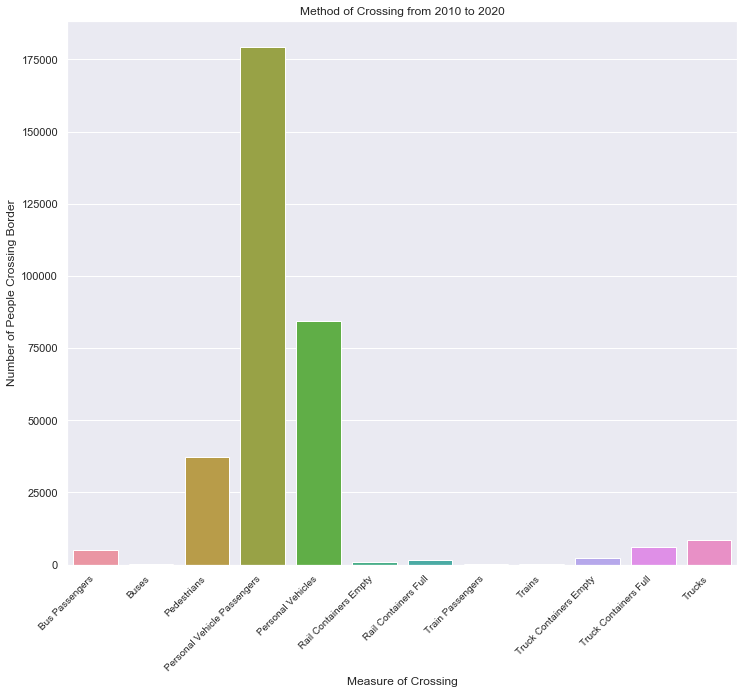

In [9]:
#Investigating Number of people crossing different borders by Measure of Crossing from 2010 to 2020
Avg_Measure = df.groupby("Measure")["Value"].mean()
Avg_Measure

sns.set(rc={'figure.figsize':(12,10)})

ax = sns.barplot(y=Avg_Measure, x = Avg_Measure.axes[0]).set(title='Method of Crossing from 2010 to 2020', xlabel = 'Measure of Crossing', ylabel = 'Number of People Crossing Border')

plt.xticks(rotation=45, ha='right', fontweight='light', fontsize='small');

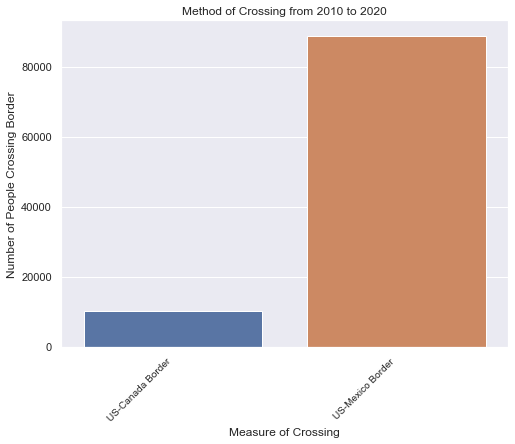

In [10]:
#Investigating Number of people crossing different borders by Border of Crossing from 2010 to 2020
Avg_Value = df.groupby("Border")["Value"].mean()
Avg_Value

plt.figure(figsize=(8,6))
ax = sns.barplot(y=Avg_Value, x = Avg_Value.axes[0]).set(title='Method of Crossing from 2010 to 2020', xlabel = 'Measure of Crossing', ylabel = 'Number of People Crossing Border')

plt.xticks(rotation=45, ha='right', fontweight='light', fontsize='small');

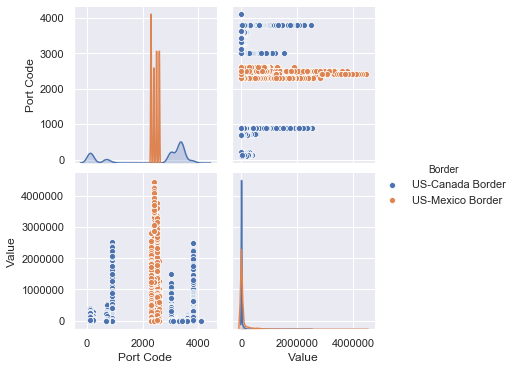

In [11]:
sns.pairplot(df, hue="Border");

In [12]:
Port_Pivot = df.pivot_table(index='Port Name', columns='Measure', values='Value')
Port_Pivot.head()

Measure,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks
Port Name,,,,,,,,,,,,
Alcan,962.879121,42.692308,21.483636,9037.882759,4159.068966,0.0,0.0,0.0,0.0,79.937931,446.886207,506.127586
Alexandria Bay,5374.453287,158.657439,98.724696,127437.303448,54008.144828,0.0,0.0,0.0,0.0,1183.824138,14893.675862,18295.313793
Algonac,NaN,NaN,NaN,4932.500000,3588.451613,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ambrose,1.040486,0.044534,0.000000,484.224138,229.731034,0.0,0.0,0.0,0.0,5.628352,2.219608,15.541353
Anacortes,43.390110,1.834254,625.993789,5553.743719,2368.462312,0.0,0.0,0.0,0.0,0.000000,0.000000,33.018634


In [13]:
Port_Pivot.columns

Index(['Bus Passengers', 'Buses', 'Pedestrians', 'Personal Vehicle Passengers',
       'Personal Vehicles', 'Rail Containers Empty', 'Rail Containers Full',
       'Train Passengers', 'Trains', 'Truck Containers Empty',
       'Truck Containers Full', 'Trucks'],
      dtype='object', name='Measure')

#### Investigate top six cities with bus and personal vehicle entrance  

In [14]:
Port_most = Port_Pivot[["Buses", "Personal Vehicles"]]

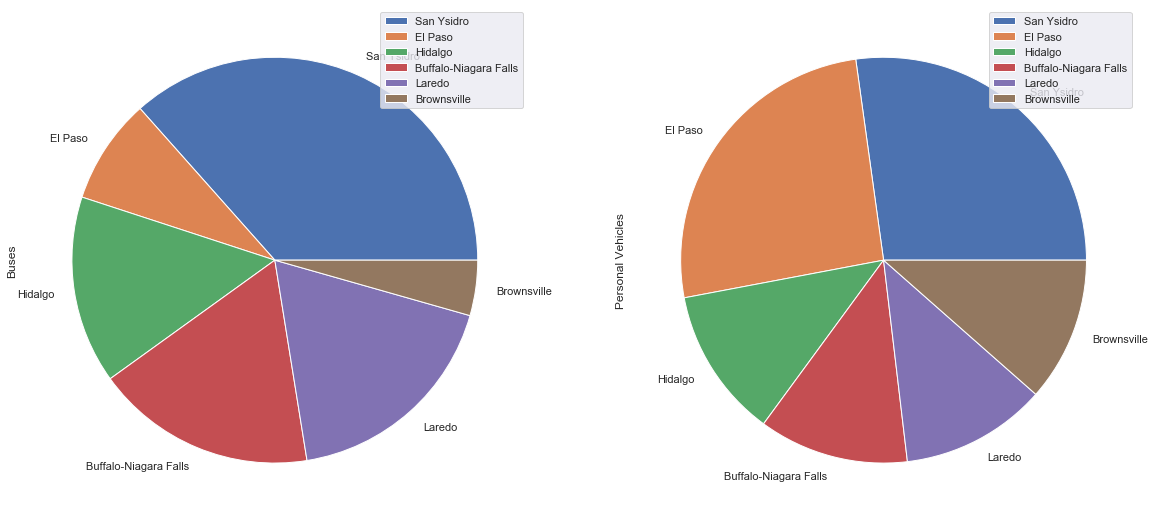

In [15]:
Port_most_6 = Port_most.nlargest(6, 'Personal Vehicles', keep='first')
Port_most_6.plot(kind='pie', subplots=True)
plt.gcf().set_size_inches(20,18)

#### Investigate top six cities with trucks and trains entrance  

In [16]:
Port_Pivot['Total Transport'] = Port_Pivot['Bus Passengers'] + Port_Pivot['Train Passengers'] + Port_Pivot['Personal Vehicle Passengers']
Port_most_tr = Port_Pivot[['Total Transport', "Pedestrians"]]

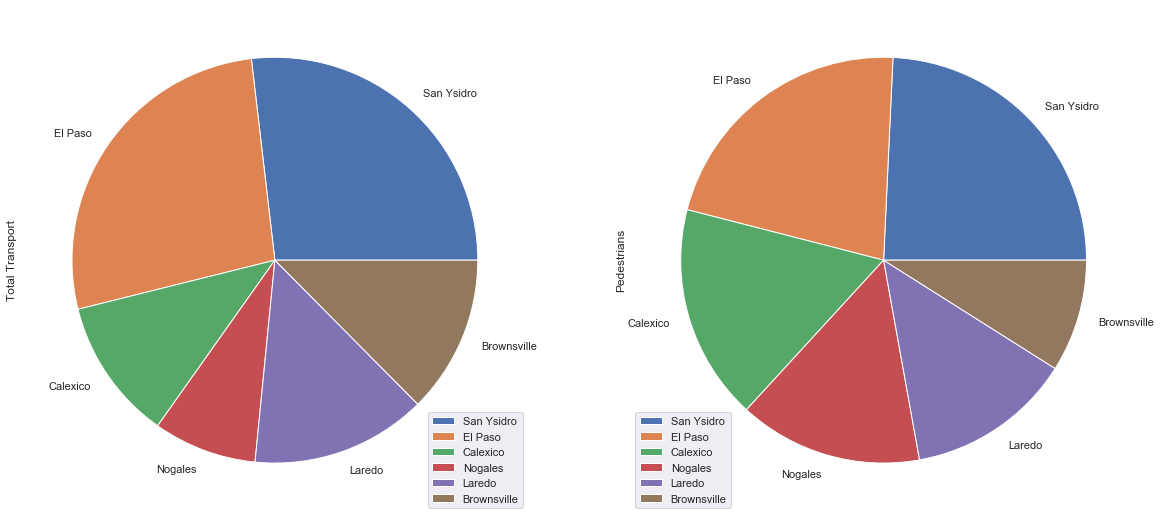

In [17]:
Port_most_tr6 = Port_most_tr.nlargest(6, 'Pedestrians', keep='first')
Port_most_tr6.plot(kind='pie', subplots=True)
plt.gcf().set_size_inches(20,18)

#### Investigating Top 20 Cities by Pedestrians Crossing

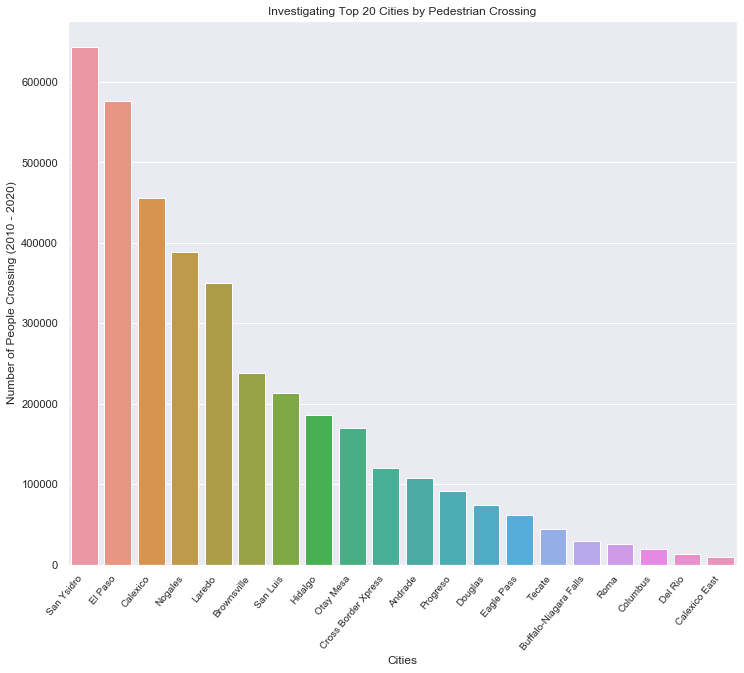

In [18]:
Port_most_tr20 = Port_most_tr.nlargest(20, 'Pedestrians')
ax = sns.barplot(x=Port_most_tr20.axes[0], y=Port_most_tr20['Pedestrians']).set(title='Investigating Top 20 Cities by Pedestrian Crossing', xlabel = 'Cities', ylabel='Number of People Crossing (2010 - 2020)')
plt.xticks(rotation=50, ha='right', fontweight='light', fontsize='small');

#### Investigating Top 20 Cities by Passengers Crossing by Buses, Personal Vehicles and Trains

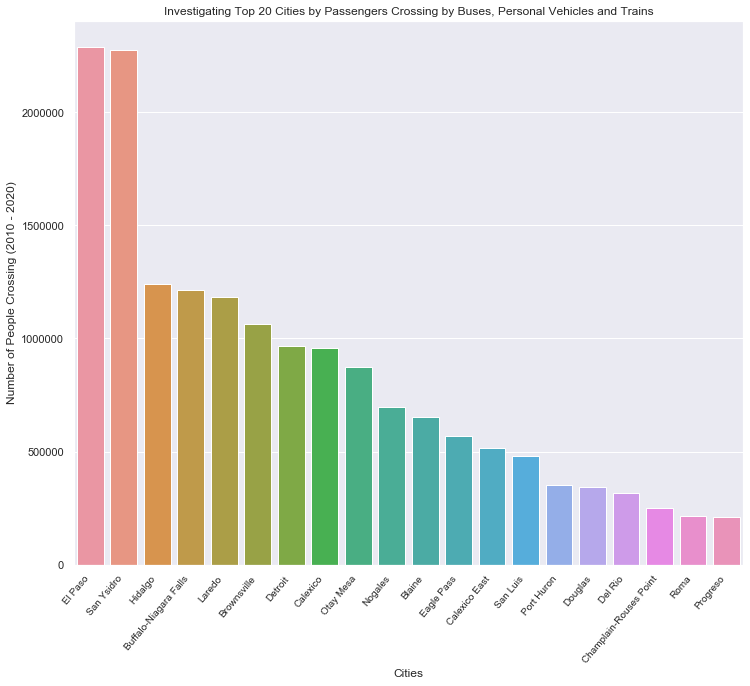

In [19]:
Port_most_tr20 = Port_most_tr.nlargest(20, 'Total Transport')
ax = sns.barplot(x=Port_most_tr20.axes[0], y=Port_most_tr20['Total Transport']).set(title='Investigating Top 20 Cities by Passengers Crossing by Buses, Personal Vehicles and Trains', xlabel = 'Cities', ylabel='Number of People Crossing (2010 - 2020)')
plt.xticks(rotation=50, ha='right', fontweight='light', fontsize='small');

#### Investigating the cities with highest number of total people crossing since 2010 and the average value per port

In [20]:
Port_stat = df.pivot_table(index='Port Name', values='Value', aggfunc=[np.sum, np.mean])
Port_stat.head()

,sum,mean
,Value,Value
Port Name,,
Alcan,4407101,1352.286284
Alexandria Bay,64210750,19678.440086
Algonac,121107,3669.909091
Ambrose,213484,69.066322
Anacortes,1690849,825.206930


In [21]:
Port_stat.columns

MultiIndex(levels=[['sum', 'mean'], ['Value']],
           codes=[[0, 1], [0, 0]])

In [22]:
#Port_stat.columns = Port_stat.columns.get_level_values(1)
Port_stat.columns = [' '.join(col).strip() for col in Port_stat.columns.values]
Port_stat.columns

Index(['sum Value', 'mean Value'], dtype='object')

In [23]:
Port_stat.head()

,sum Value,mean Value
Port Name,,
Alcan,4407101,1352.286284
Alexandria Bay,64210750,19678.440086
Algonac,121107,3669.909091
Ambrose,213484,69.066322
Anacortes,1690849,825.206930


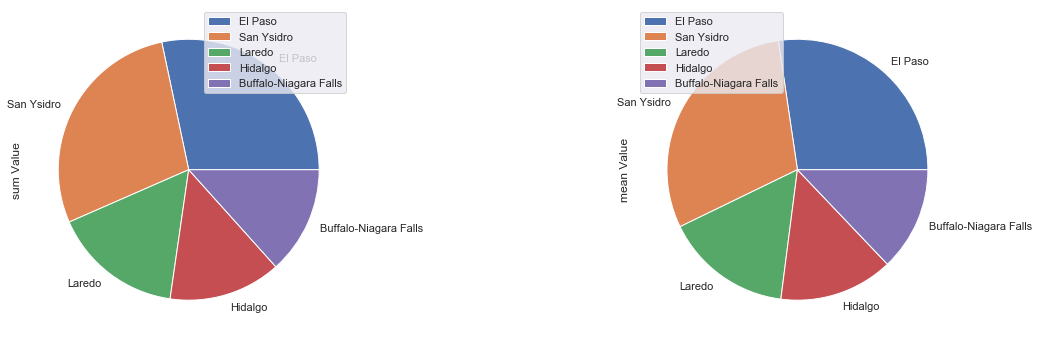

In [24]:
Port_stat_ten = Port_stat.nlargest(5, 'sum Value')
Port_stat_ten.plot(kind='pie', subplots=True)
plt.gcf().set_size_inches(20,6)
plt.legend(loc="upper left");

#### Top 20 cities with highest number of people crossing

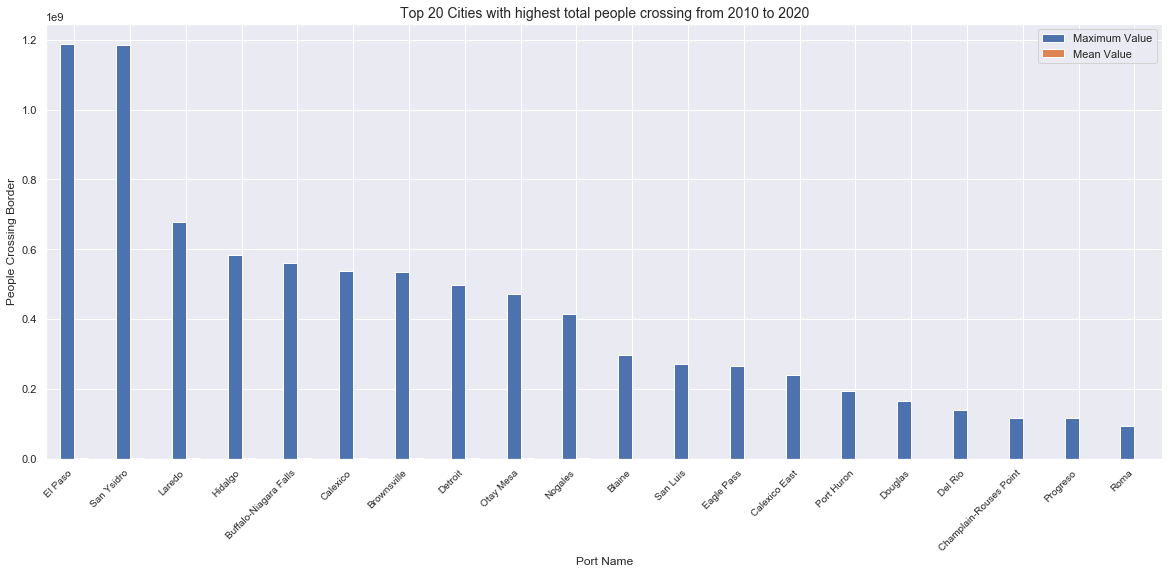

In [25]:
Port_stat_20 = Port_stat.nlargest(20, 'sum Value', keep="last")
Port_stat_20.plot(kind='bar')
plt.gcf().set_size_inches(20,8)

plt.xticks(rotation=45, ha='right', fontweight='light', fontsize='small');
plt.title("Top 20 Cities with highest total people crossing from 2010 to 2020", fontsize=14)
plt.ylabel("People Crossing Border")
plt.legend(["Maximum Value", "Mean Value"]);

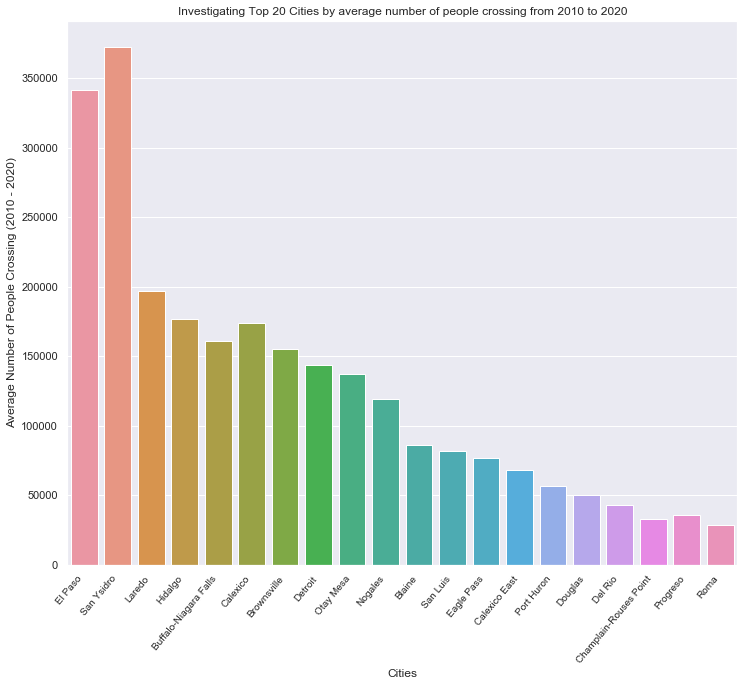

In [26]:
ax = sns.barplot(x=Port_stat_20.axes[0], y=Port_stat_20['mean Value']).set(title='Investigating Top 20 Cities by average number of people crossing from 2010 to 2020', xlabel = 'Cities', ylabel='Average Number of People Crossing (2010 - 2020)')
plt.xticks(rotation=50, ha='right', fontweight='light', fontsize='small');

### Regression

In [74]:
Avg_Year_Values = df.groupby(pd.DatetimeIndex(df['Date']).year)["Value"].mean()
Avg_Year_Values.head()

Date
1996    28977.235100
1997    33318.109358
1998    34289.940939
1999    36303.716559
2000    36409.219391
Name: Value, dtype: float64

In [75]:
x = Avg_Year_Values.axes[0].values.reshape(-1,1)
y = Avg_Year_Values.values.reshape(-1,1)
print(x.shape)
print(y.shape)

(25, 1)
(25, 1)


In [80]:
Poly_reg=PolynomialFeatures(degree=4) 
x_poly=Poly_reg.fit_transform(x)
Lin_reg = LinearRegression()
Lin_reg.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

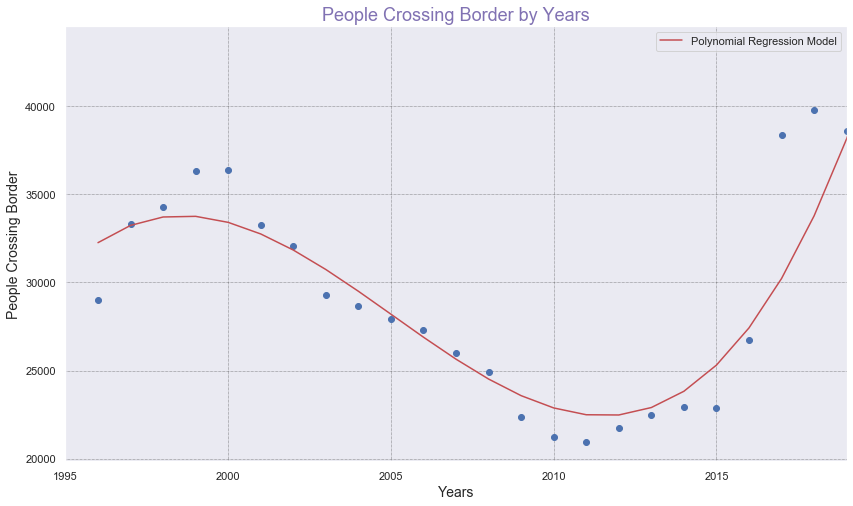

In [82]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

plt.figure(figsize=(14, 8))
plt.scatter(x,y)
plt.xlim(1995,2019)
plt.xlabel("Years",fontsize=14)
plt.ylabel("People Crossing Border",fontsize=14)
plt.title("People Crossing Border by Years",fontdict={'fontsize': 18, 'fontweight': 'medium'},color='m')
plt.grid(color='k', linestyle='dotted', linewidth=0.5)
y_pred=Lin_reg.predict(x_poly)
plt.plot(x,y_pred,color="r",label="Polynomial Regression Model")
plt.legend()
plt.show()

In [83]:
# Predicting total number of immigration in n with Polymonial Regression
n = int(input());
Prediction = int(Lin_reg.predict(Poly_reg.fit_transform([[n]])));
print("The Predicted number of people that will cross the border in ", n, "is", Prediction)

2022
The Predicted number of people that will cross the border in  2022 is 56819
